<a href="https://colab.research.google.com/github/mmarin11/Colabfiles/blob/main/Practica19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga de datos y análisis inicial

In [2]:
# ============================================================================

# IMPORTAR BIBLIOTECAS NECESARIAS
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, anderson, kstest, norm
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("=" * 80)
print("ANÁLISIS EXPLORATORIO DE DATOS - HABERMAN'S SURVIVAL DATASET")
print("=" * 80)
print("\nDataset: Supervivencia de pacientes con cáncer de mama")
print("Fuente: UCI Machine Learning Repository")
print("=" * 80)

# ============================================================================
# CARGAR LOS DATOS
# ============================================================================
print("\n[1] CARGANDO DATOS...")

# URL del dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']

# Cargar el dataset
df_original = pd.read_csv(url, header=None, names=column_names)

print(f"✓ Datos cargados exitosamente")
print(f"✓ Dimensiones: {df_original.shape[0]} filas × {df_original.shape[1]} columnas")

# Información de las columnas
print("\n" + "=" * 80)
print("DESCRIPCIÓN DE LAS VARIABLES")
print("=" * 80)
print("""
1. age:    Edad del paciente al momento de la operación (años)
2. year:   Año de la operación (formato: últimos 2 dígitos, ej: 58 = 1958)
3. nodes:  Número de ganglios axilares positivos detectados
4. status: Estado de supervivencia
           - 1 = Sobrevivió 5 años o más
           - 2 = Murió dentro de 5 años
""")

# Mostrar primeras filas
print("\nPrimeras 10 filas del dataset:")
print(df_original.head(10))

# Información general
print("\n" + "=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
print(df_original.info())

# ============================================================================
# ANÁLISIS DE DATOS FALTANTES (ANTES DEL TRATAMIENTO)
# ============================================================================
print("\n" + "=" * 80)
print("ANÁLISIS DE DATOS FALTANTES (ANTES DEL TRATAMIENTO)")
print("=" * 80)

# Verificar valores nulos
missing_data = pd.DataFrame({
    'Columna': df_original.columns,
    'Valores_Faltantes': df_original.isnull().sum(),
    'Porcentaje': (df_original.isnull().sum() / len(df_original) * 100).round(2)
})

print("\n", missing_data.to_string(index=False))

if missing_data['Valores_Faltantes'].sum() == 0:
    print("\n✓ ¡Excelente! No hay valores faltantes en el dataset")
else:
    print(f"\n⚠ Total de valores faltantes: {missing_data['Valores_Faltantes'].sum()}")

# Verificar valores especiales o anómalos
print("\n" + "=" * 80)
print("VERIFICACIÓN DE VALORES ESPECIALES")
print("=" * 80)

# Verificar valores negativos o cero en columnas que no deberían tenerlos
print("\nValores mínimos por columna:")
print(df_original.min())

print("\nValores máximos por columna:")
print(df_original.max())

# Verificar duplicados
duplicates = df_original.duplicated().sum()
print(f"\nFilas duplicadas: {duplicates}")

ANÁLISIS EXPLORATORIO DE DATOS - HABERMAN'S SURVIVAL DATASET

Dataset: Supervivencia de pacientes con cáncer de mama
Fuente: UCI Machine Learning Repository

[1] CARGANDO DATOS...
✓ Datos cargados exitosamente
✓ Dimensiones: 306 filas × 4 columnas

DESCRIPCIÓN DE LAS VARIABLES

1. age:    Edad del paciente al momento de la operación (años)
2. year:   Año de la operación (formato: últimos 2 dígitos, ej: 58 = 1958)
3. nodes:  Número de ganglios axilares positivos detectados
4. status: Estado de supervivencia
           - 1 = Sobrevivió 5 años o más
           - 2 = Murió dentro de 5 años


Primeras 10 filas del dataset:
   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
5   33    58     10       1
6   33    60      0       1
7   34    59      0       2
8   34    66      9       2
9   34    58     30       1

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFra

#Estadísticas descriptivas antes de tratamiento

In [10]:
# ============================================================================
# ESTADÍSTICAS DESCRIPTIVAS (ANTES DEL TRATAMIENTO)
# ============================================================================
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS (ANTES DEL TRATAMIENTO)")
print("=" * 80)
print(df_original.describe())

# Estadísticas adicionales
print("\n" + "=" * 80)
print("ESTADÍSTICAS ADICIONALES")
print("=" * 80)

for col in ['age', 'year', 'nodes']:
    print(f"\n{col.upper()}:")
    print(f"  Media: {df_original[col].mean():.2f}")
    print(f"  Mediana: {df_original[col].median():.2f}")
    print(f"  Moda: {df_original[col].mode().values[0]}")
    print(f"  Desviación Estándar: {df_original[col].std():.2f}")
    print(f"  Rango: [{df_original[col].min()}, {df_original[col].max()}]")
    print(f"  IQR: {df_original[col].quantile(0.75) - df_original[col].quantile(0.25):.2f}")
    print(f"  Asimetría (Skewness): {df_original[col].skew():.2f}")
    print(f"  Curtosis: {df_original[col].kurtosis():.2f}")

# Distribución de la variable objetivo
print("\n" + "=" * 80)
print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (STATUS)")
print("=" * 80)
status_counts = df_original['status'].value_counts().sort_index()
status_pct = (status_counts / len(df_original) * 100).round(2)

print("\nConteo por categoría:")
print(f"  Status 1 (Sobrevivió ≥5 años): {status_counts[1]} pacientes ({status_pct[1]}%)")
print(f"  Status 2 (Murió <5 años): {status_counts[2]} pacientes ({status_pct[2]}%)")
print(f"\nBalance del dataset: {'Desbalanceado' if abs(status_pct[1] - status_pct[2]) > 15 else 'Relativamente balanceado'}")


ESTADÍSTICAS DESCRIPTIVAS (ANTES DEL TRATAMIENTO)
              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000

ESTADÍSTICAS ADICIONALES

AGE:
  Media: 52.46
  Mediana: 52.00
  Moda: 52
  Desviación Estándar: 10.80
  Rango: [30, 83]
  IQR: 16.75
  Asimetría (Skewness): 0.15
  Curtosis: -0.59

YEAR:
  Media: 62.85
  Mediana: 63.00
  Moda: 58
  Desviación Estándar: 3.25
  Rango: [58, 69]
  IQR: 5.75
  Asimetría (Skewness): 0.08
  Curtosis: -1.12

NODES:
  Media: 4.03
  Mediana: 1.00
  Moda: 0
  Desviación Estándar: 7.19
  Rango: [0, 52]
  IQR: 4.00
  Asimetría (Skewness

#EDA antes de tratamiento


INICIANDO EDA - VISUALIZACIONES

Generando histogramas y gráficas de densidad...


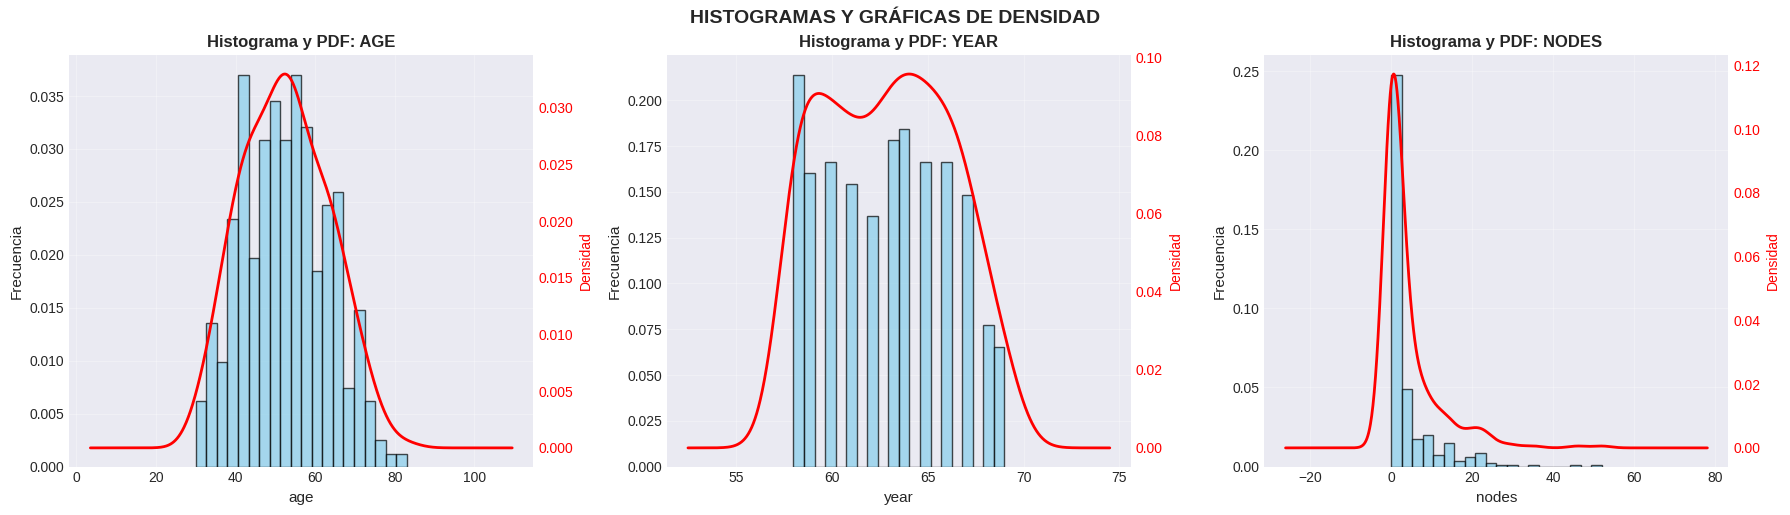


Generando gráfica de barras para variable categórica STATUS...


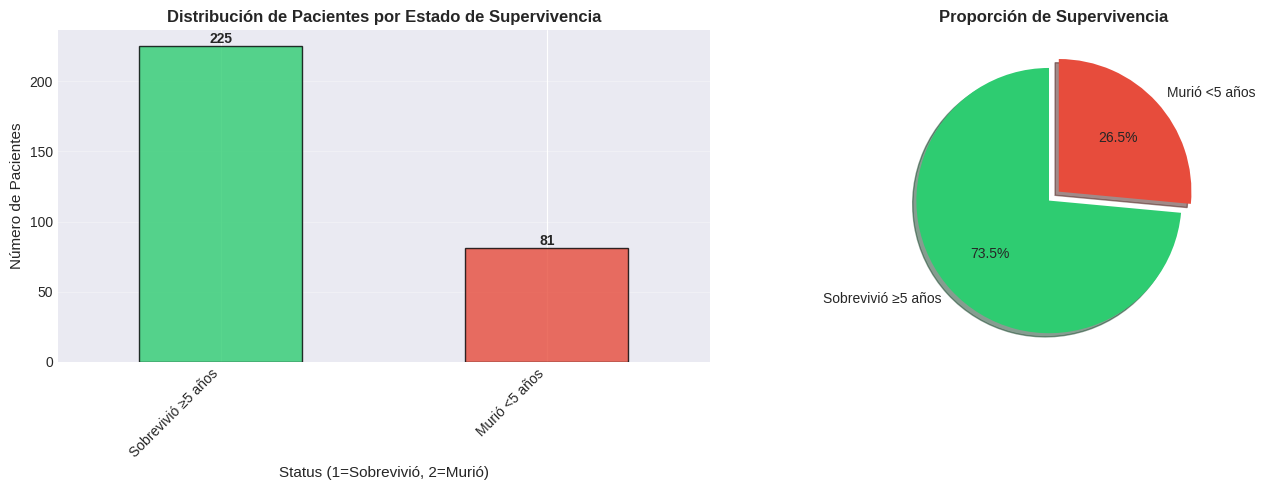


Generando boxplots para identificar outliers...


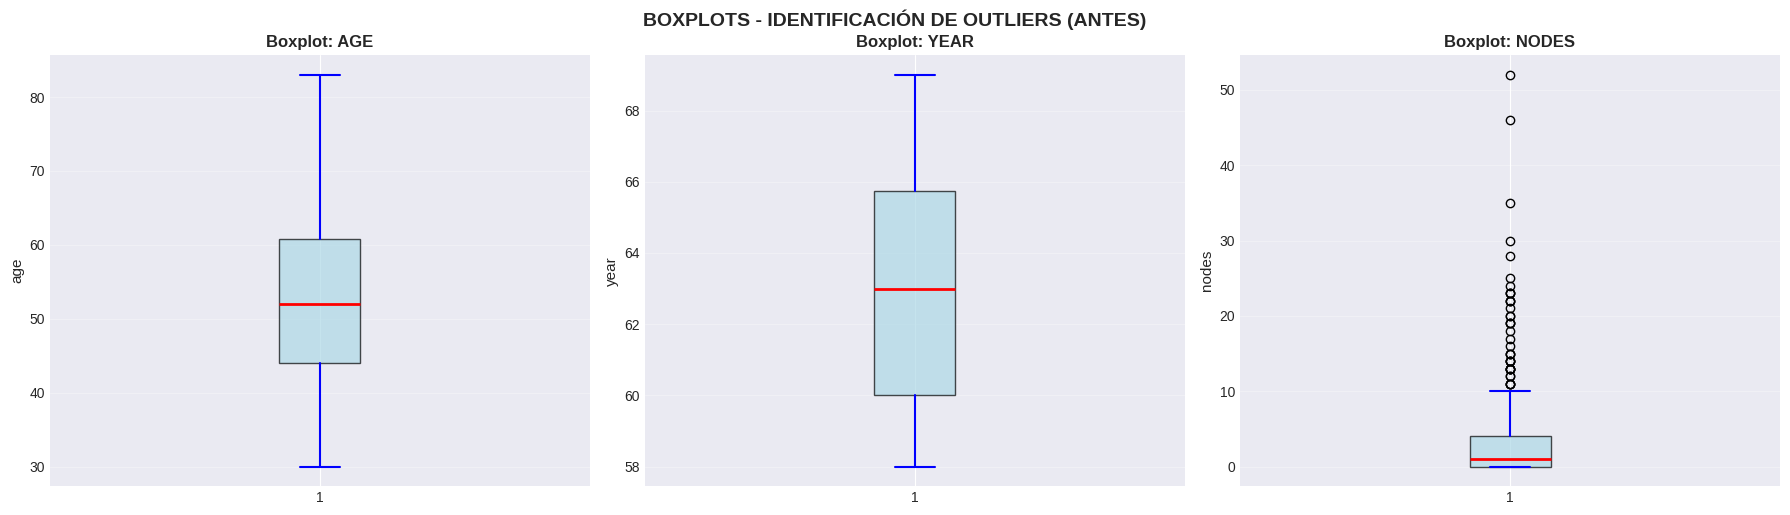


ANÁLISIS DE OUTLIERS (MÉTODO IQR)

 Columna    Q1    Q3   IQR Límite_Inferior Límite_Superior  Num_Outliers Porcentaje
    age 44.00 60.75 16.75           18.88           85.88             0      0.00%
   year 60.00 65.75  5.75           51.38           74.38             0      0.00%
  nodes  0.00  4.00  4.00           -6.00           10.00            40     13.07%

Generando boxplots separados por estado de supervivencia...


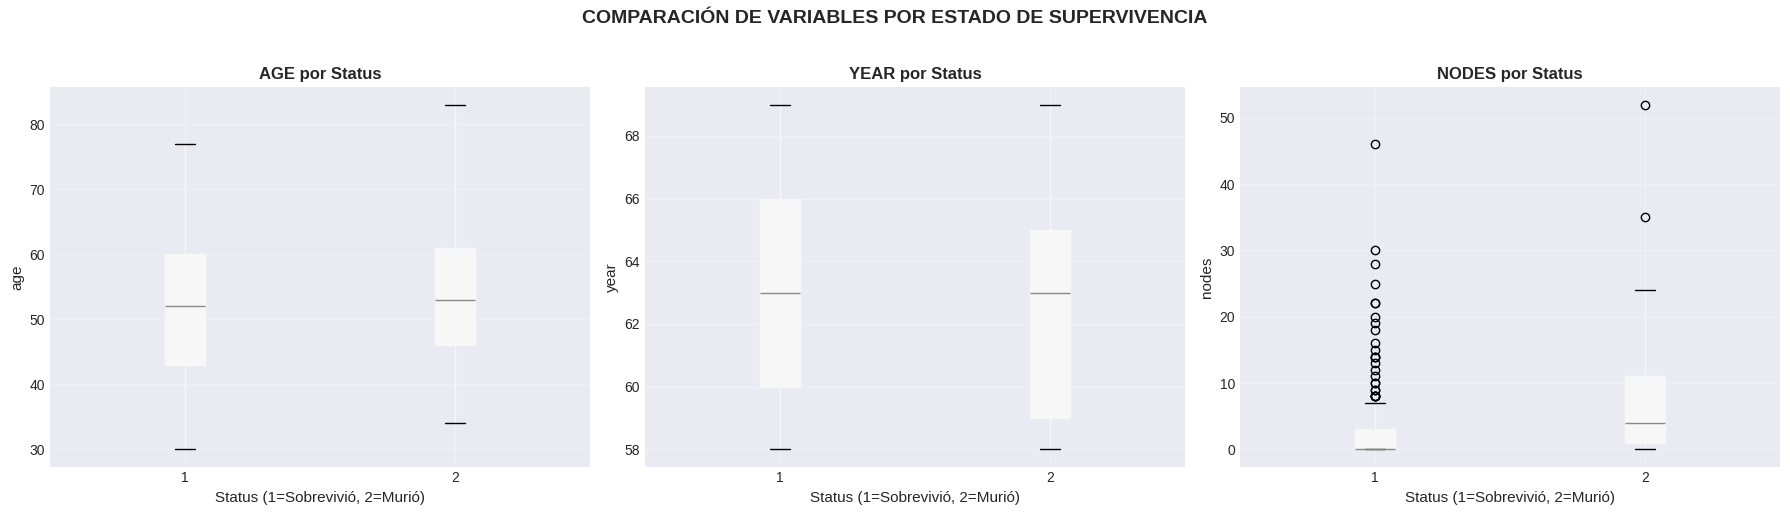


Generando matriz de correlación y mapa de calor...


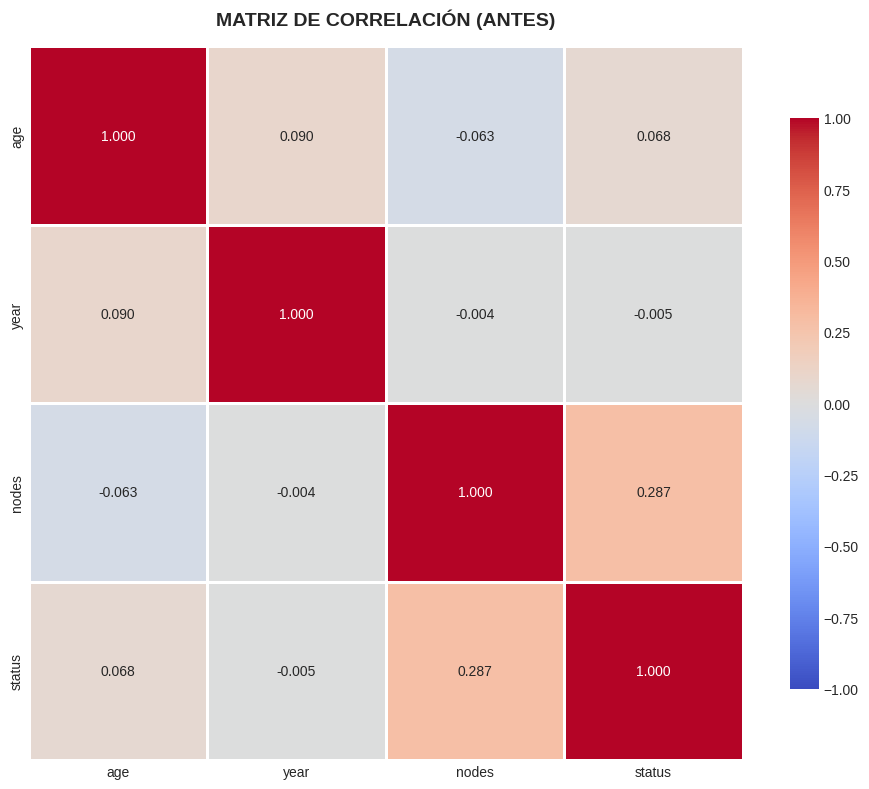


ANÁLISIS DE CORRELACIONES

Correlaciones con STATUS (variable objetivo):
  nodes     : +0.287  (Débil positiva)
  age       : +0.068  (Débil positiva)
  year      : -0.005  (Débil negativa)

Correlaciones entre variables predictoras:

Generando pairplot...


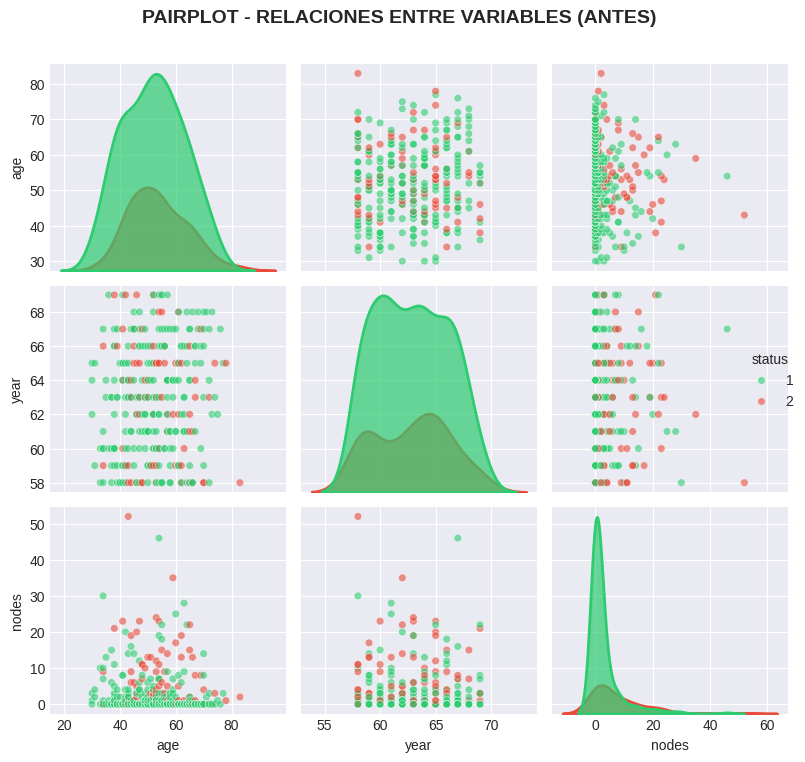


Realizando pruebas de normalidad...

PRUEBAS DE NORMALIDAD

Resultados de Pruebas de Normalidad:
Columna Shapiro_W Shapiro_p Normal_SW KS_stat   KS_p Normal_KS
    age    0.9895    0.0260      ✗ No  0.0479 0.4698      ✓ Sí
   year    0.9468    0.0000      ✗ No  0.1074 0.0016      ✗ No
  nodes    0.6153    0.0000      ✗ No  0.2877 0.0000      ✗ No

Nota: ✓ = Distribución normal (p > 0.05), ✗ = No normal (p < 0.05)
Interpretación: Si p-value > 0.05, NO rechazamos H₀ → los datos son normales

 Generando QQ plots...


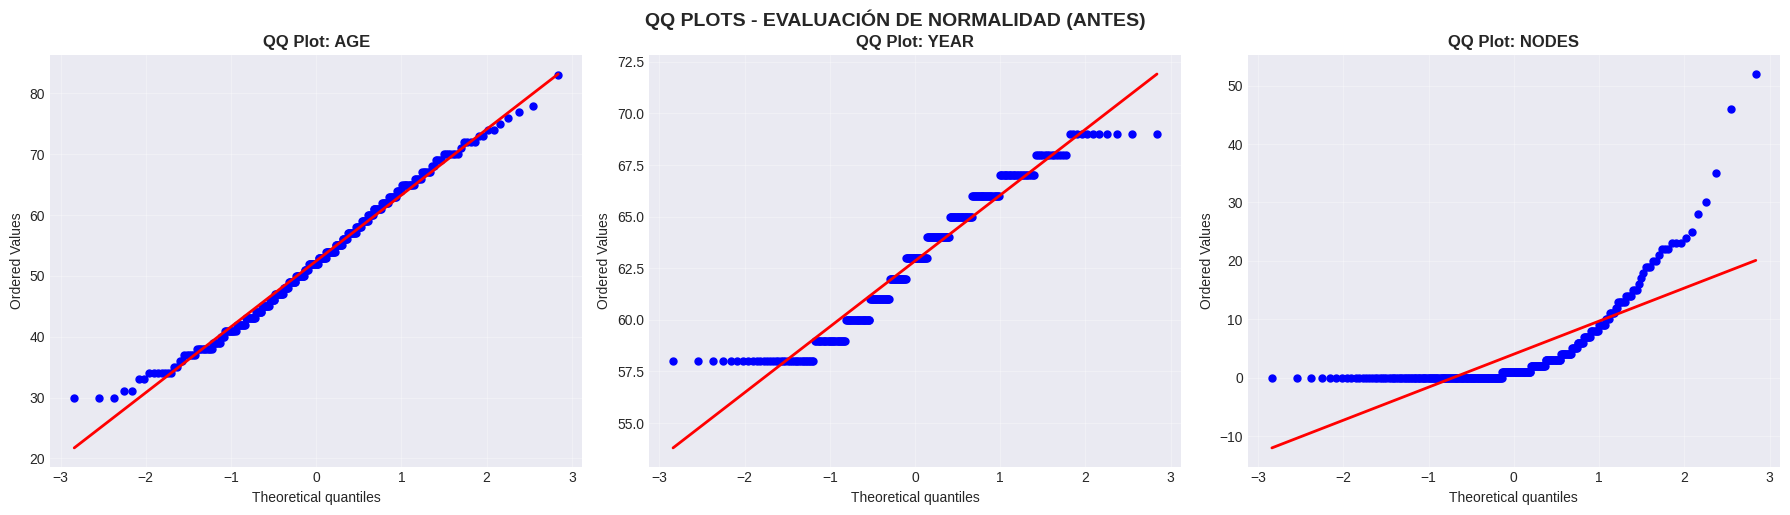

In [4]:
# ============================================================================
# ANÁLISIS EXPLORATORIO DE DATOS (EDA) - ANTES DEL TRATAMIENTO
# ============================================================================
print("\n" + "=" * 80)
print("INICIANDO EDA - VISUALIZACIONES")
print("=" * 80)

# --- HISTOGRAMAS Y DENSIDAD (PDF) ---
print("\nGenerando histogramas y gráficas de densidad...")

numeric_columns = ['age', 'year', 'nodes']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(numeric_columns):
    # Histograma con densidad
    axes[idx].hist(df_original[col], bins=20, edgecolor='black', alpha=0.7, density=True, color='skyblue')

    # Curva de densidad (KDE)
    df_original[col].plot(kind='kde', ax=axes[idx], secondary_y=True, color='red', linewidth=2)
    axes[idx].right_ax.set_ylabel('Densidad', color='red', fontsize=10)
    axes[idx].right_ax.tick_params(axis='y', labelcolor='red')

    axes[idx].set_title(f'Histograma y PDF: {col.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Frecuencia', fontsize=11)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('HISTOGRAMAS Y GRÁFICAS DE DENSIDAD', fontsize=14, y=1.02, fontweight='bold')
plt.show()

# --- GRÁFICA DE BARRAS PARA STATUS ---
print("\nGenerando gráfica de barras para variable categórica STATUS...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica 1: Conteo absoluto
status_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], edgecolor='black', alpha=0.8)
axes[0].set_title('Distribución de Pacientes por Estado de Supervivencia', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Status (1=Sobrevivió, 2=Murió)', fontsize=11)
axes[0].set_ylabel('Número de Pacientes', fontsize=11)
axes[0].set_xticklabels(['Sobrevivió ≥5 años', 'Murió <5 años'], rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(status_counts):
    axes[0].text(i, v + 2, str(v), ha='center', fontweight='bold')

# Gráfica 2: Porcentaje (Pie chart)
axes[1].pie(status_counts, labels=['Sobrevivió ≥5 años', 'Murió <5 años'],
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90,
            explode=(0.05, 0.05), shadow=True)
axes[1].set_title('Proporción de Supervivencia', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# --- BOXPLOTS PARA IDENTIFICAR OUTLIERS ---
print("\nGenerando boxplots para identificar outliers...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(numeric_columns):
    bp = axes[idx].boxplot(df_original[col], vert=True, patch_artist=True,
                           boxprops=dict(facecolor='lightblue', alpha=0.7),
                           medianprops=dict(color='red', linewidth=2),
                           whiskerprops=dict(color='blue', linewidth=1.5),
                           capprops=dict(color='blue', linewidth=1.5))

    axes[idx].set_title(f'Boxplot: {col.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=11)
    axes[idx].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.suptitle('BOXPLOTS - IDENTIFICACIÓN DE OUTLIERS (ANTES)', fontsize=14, y=1.02, fontweight='bold')
plt.show()

# Contar outliers usando IQR
print("\n" + "=" * 80)
print("ANÁLISIS DE OUTLIERS (MÉTODO IQR)")
print("=" * 80)

outlier_summary = []
for col in numeric_columns:
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_original[(df_original[col] < lower_bound) | (df_original[col] > upper_bound)][col]

    outlier_summary.append({
        'Columna': col,
        'Q1': f"{Q1:.2f}",
        'Q3': f"{Q3:.2f}",
        'IQR': f"{IQR:.2f}",
        'Límite_Inferior': f"{lower_bound:.2f}",
        'Límite_Superior': f"{upper_bound:.2f}",
        'Num_Outliers': len(outliers),
        'Porcentaje': f"{(len(outliers) / len(df_original) * 100):.2f}%"
    })

outlier_df = pd.DataFrame(outlier_summary)
print("\n", outlier_df.to_string(index=False))

# --- BOXPLOTS SEPARADOS POR STATUS ---
print("\nGenerando boxplots separados por estado de supervivencia...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(numeric_columns):
    df_original.boxplot(column=col, by='status', ax=axes[idx], patch_artist=True)
    axes[idx].set_title(f'{col.upper()} por Status', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Status (1=Sobrevivió, 2=Murió)', fontsize=11)
    axes[idx].set_ylabel(col, fontsize=11)
    axes[idx].grid(alpha=0.3)

plt.suptitle('COMPARACIÓN DE VARIABLES POR ESTADO DE SUPERVIVENCIA', fontsize=14, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

# --- MATRIZ DE CORRELACIÓN Y MAPA DE CALOR ---
print("\nGenerando matriz de correlación y mapa de calor...")

# Calcular matriz de correlación
correlation_matrix = df_original.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('MATRIZ DE CORRELACIÓN (ANTES)', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# Identificar correlaciones significativas
print("\n" + "=" * 80)
print("ANÁLISIS DE CORRELACIONES")
print("=" * 80)

# Correlaciones con la variable objetivo (status)
print("\nCorrelaciones con STATUS (variable objetivo):")
status_corr = correlation_matrix['status'].sort_values(ascending=False)
for var, corr in status_corr.items():
    if var != 'status':
        strength = 'Fuerte' if abs(corr) > 0.5 else 'Moderada' if abs(corr) > 0.3 else 'Débil'
        direction = 'positiva' if corr > 0 else 'negativa'
        print(f"  {var:10s}: {corr:+.3f}  ({strength} {direction})")

# Correlaciones entre predictores
print("\nCorrelaciones entre variables predictoras:")
for i, var1 in enumerate(numeric_columns):
    for var2 in numeric_columns[i+1:]:
        corr = correlation_matrix.loc[var1, var2]
        if abs(corr) > 0.3:
            print(f"  {var1} ↔ {var2}: {corr:+.3f}")

# --- PAIRPLOT ---
print("\nGenerando pairplot...")

pairplot = sns.pairplot(df_original, hue='status', palette={1: '#2ecc71', 2: '#e74c3c'},
                        diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30},
                        diag_kws={'alpha': 0.7, 'linewidth': 2})
pairplot.fig.suptitle('PAIRPLOT - RELACIONES ENTRE VARIABLES (ANTES)', y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# --- PRUEBAS DE NORMALIDAD ---
print("\nRealizando pruebas de normalidad...")

print("\n" + "=" * 80)
print("PRUEBAS DE NORMALIDAD")
print("=" * 80)

normality_results = []

for col in numeric_columns:
    data = df_original[col].dropna()

    # Test de Shapiro-Wilk
    stat_sw, p_sw = shapiro(data)

    # Test de Anderson-Darling
    result_ad = anderson(data, dist='norm')

    # Test de Kolmogorov-Smirnov
    stat_ks, p_ks = kstest(data, 'norm', args=(data.mean(), data.std()))

    normality_results.append({
        'Columna': col,
        'Shapiro_W': f"{stat_sw:.4f}",
        'Shapiro_p': f"{p_sw:.4f}",
        'Normal_SW': '✓ Sí' if p_sw > 0.05 else '✗ No',
        'KS_stat': f"{stat_ks:.4f}",
        'KS_p': f"{p_ks:.4f}",
        'Normal_KS': '✓ Sí' if p_ks > 0.05 else '✗ No'
    })

normality_df = pd.DataFrame(normality_results)
print("\nResultados de Pruebas de Normalidad:")
print(normality_df.to_string(index=False))
print("\nNota: ✓ = Distribución normal (p > 0.05), ✗ = No normal (p < 0.05)")
print("Interpretación: Si p-value > 0.05, NO rechazamos H₀ → los datos son normales")

# --- PLOTS ---
print("\n Generando QQ plots...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(numeric_columns):
    stats.probplot(df_original[col], dist="norm", plot=axes[idx])
    axes[idx].set_title(f'QQ Plot: {col.upper()}', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)
    axes[idx].get_lines()[0].set_markerfacecolor('blue')
    axes[idx].get_lines()[0].set_markersize(5)
    axes[idx].get_lines()[1].set_color('red')
    axes[idx].get_lines()[1].set_linewidth(2)

plt.tight_layout()
plt.suptitle('QQ PLOTS - EVALUACIÓN DE NORMALIDAD (ANTES)', fontsize=14, y=1.02, fontweight='bold')
plt.show()

#Tratamiento de datos faltantes

In [7]:
# ============================================================================
# TRATAMIENTO DE DATOS FALTANTES
# ============================================================================
print("\n" + "=" * 80)
print("TRATAMIENTO DE DATOS FALTANTES")
print("=" * 80)

# Crear una copia del dataframe
df_treated = df_original.copy()

# Verificar si hay valores faltantes
total_missing = df_treated.isnull().sum().sum()

if total_missing == 0:
    print("\n✓ El dataset NO tiene valores faltantes (NaN)")
    print("✓ Sin embargo, verificaremos si hay valores atípicos que requieran tratamiento")

    # Verificar valores negativos o anómalos
    print("\n Verificando valores anómalos...")

    anomalies_found = False

    # Age debe ser positiva
    if (df_treated['age'] <= 0).any():
        print(f"  ⚠ Encontradas {(df_treated['age'] <= 0).sum()} edades inválidas (≤0)")
        anomalies_found = True

    # Nodes no puede ser negativo
    if (df_treated['nodes'] < 0).any():
        print(f"  ⚠ Encontrados {(df_treated['nodes'] < 0).sum()} valores negativos en 'nodes'")
        anomalies_found = True

    # Status debe ser 1 o 2
    if not df_treated['status'].isin([1, 2]).all():
        print(f"  ⚠ Status con valores diferentes a 1 o 2")
        anomalies_found = True

    if not anomalies_found:
        print("  ✓ No se encontraron valores anómalos")

    print("\n[6.2] ESTRATEGIA DE TRATAMIENTO:")
    print("-" * 80)
    print("Como el dataset no tiene valores faltantes, se procederá a:")
    print("1. Mantener todos los datos tal como están")
    print("2. Documentar que no se requirió imputación")
    print("3. Los outliers se mantendrán para análisis (representan casos clínicos reales)")
    print("-" * 80)

else:
    print(f"\n⚠ Se encontraron {total_missing} valores faltantes")
    print("\n[6.2] ESTRATEGIA DE IMPUTACIÓN:")
    print("-" * 80)

    for col in df_treated.columns:
        missing_count = df_treated[col].isnull().sum()
        if missing_count > 0:
            print(f"\n{col}:")
            print(f"  Valores faltantes: {missing_count} ({missing_count/len(df_treated)*100:.2f}%)")

            if col in numeric_columns:
                # Imputar con mediana (más robusta ante outliers)
                median_value = df_treated[col].median()
                df_treated[col].fillna(median_value, inplace=True)
                print(f"  Estrategia: Imputación por MEDIANA = {median_value:.2f}")
                print(f"  Razón: Robusta ante outliers en datos médicos")
            else:
                # Imputar con moda para categóricas
                mode_value = df_treated[col].mode()[0]
                df_treated[col].fillna(mode_value, inplace=True)
                print(f"  Estrategia: Imputación por MODA = {mode_value}")

print(f"\n✓ Tratamiento completado")
print(f"✓ Forma del dataset: {df_treated.shape}")

# Verificar que no queden valores faltantes
remaining_missing = df_treated.isnull().sum().sum()
if remaining_missing == 0:
    print("✓ Verificación: 0 valores faltantes después del tratamiento")

# ============================================================================
# ANÁLISIS ESTADÍSTICO ADICIONAL
# ============================================================================
print("\n" + "=" * 80)
print("ANÁLISIS ESTADÍSTICO ADICIONAL")
print("=" * 80)

# Test t para diferencias entre grupos (sobrevivió vs murió)
print("\nTest T de Student - Diferencias entre grupos de supervivencia:")
print("-" * 80)

for col in numeric_columns:
    group1 = df_treated[df_treated['status'] == 1][col]
    group2 = df_treated[df_treated['status'] == 2][col]

    t_stat, p_value = stats.ttest_ind(group1, group2)

    print(f"\n{col.upper()}:")
    print(f"  Media Status=1 (Sobrevivió): {group1.mean():.2f}")
    print(f"  Media Status=2 (Murió): {group2.mean():.2f}")
    print(f"  Diferencia: {abs(group1.mean() - group2.mean()):.2f}")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Resultado: {'Diferencia SIGNIFICATIVA' if p_value < 0.05 else 'NO hay diferencia significativa'}")


TRATAMIENTO DE DATOS FALTANTES

✓ El dataset NO tiene valores faltantes (NaN)
✓ Sin embargo, verificaremos si hay valores atípicos que requieran tratamiento

 Verificando valores anómalos...
  ✓ No se encontraron valores anómalos

[6.2] ESTRATEGIA DE TRATAMIENTO:
--------------------------------------------------------------------------------
Como el dataset no tiene valores faltantes, se procederá a:
1. Mantener todos los datos tal como están
2. Documentar que no se requirió imputación
3. Los outliers se mantendrán para análisis (representan casos clínicos reales)
--------------------------------------------------------------------------------

✓ Tratamiento completado
✓ Forma del dataset: (306, 4)
✓ Verificación: 0 valores faltantes después del tratamiento

ANÁLISIS ESTADÍSTICO ADICIONAL

Test T de Student - Diferencias entre grupos de supervivencia:
--------------------------------------------------------------------------------

AGE:
  Media Status=1 (Sobrevivió): 52.02
  Media St

#Analisis

In [9]:
# ============================================================================
# RESUMEN FINAL Y CONCLUSIONES
# ============================================================================
print("\n" + "=" * 80)
print("RESUMEN FINAL DEL ANÁLISIS")
print("=" * 80)

print(f"""
✓ DATASET ANALIZADO: Haberman's Survival
  - Total de pacientes: {len(df_original)}
  - Variables: {len(df_original.columns)} ({len(numeric_columns)} numéricas, 1 categórica)
  - Período: 1958-1969

✓ VALORES FALTANTES:
  - Antes: {df_original.isnull().sum().sum()} valores faltantes
  - Después: {df_treated.isnull().sum().sum()} valores faltantes
  - Estrategia: {'No se requirió imputación' if total_missing == 0 else 'Imputación por mediana'}

✓ OUTLIERS IDENTIFICADOS:
  - Principalmente en la variable 'nodes' (ganglios positivos)
  - Representan casos clínicos reales, NO se eliminaron

✓ NORMALIDAD:
  - Age: {normality_df[normality_df['Columna']=='age']['Normal_SW'].values[0]}
  - Year: {normality_df[normality_df['Columna']=='year']['Normal_SW'].values[0]}
  - Nodes: {normality_df[normality_df['Columna']=='nodes']['Normal_SW'].values[0]}

✓ CORRELACIONES CON STATUS (supervivencia):
  - Correlación más fuerte: nodes (ganglios positivos)
  - Implicación: A mayor número de ganglios positivos, menor supervivencia

✓ DISTRIBUCIÓN DE SUPERVIVENCIA:
  - Sobrevivió ≥5 años: {status_counts[1]} pacientes ({status_pct[1]}%)
  - Murió <5 años: {status_counts[2]} pacientes ({status_pct[2]}%)
  - Dataset: {'Desbalanceado' if abs(status_pct[1] - status_pct[2]) > 15 else 'Relativamente balanceado'}

""")


RESUMEN FINAL DEL ANÁLISIS

✓ DATASET ANALIZADO: Haberman's Survival
  - Total de pacientes: 306
  - Variables: 4 (3 numéricas, 1 categórica)
  - Período: 1958-1969

✓ VALORES FALTANTES:
  - Antes: 0 valores faltantes
  - Después: 0 valores faltantes
  - Estrategia: No se requirió imputación

✓ OUTLIERS IDENTIFICADOS:
  - Principalmente en la variable 'nodes' (ganglios positivos)
  - Representan casos clínicos reales, NO se eliminaron

✓ NORMALIDAD:
  - Age: ✗ No
  - Year: ✗ No
  - Nodes: ✗ No

✓ CORRELACIONES CON STATUS (supervivencia):
  - Correlación más fuerte: nodes (ganglios positivos)
  - Implicación: A mayor número de ganglios positivos, menor supervivencia

✓ DISTRIBUCIÓN DE SUPERVIVENCIA:
  - Sobrevivió ≥5 años: 225 pacientes (73.53%)
  - Murió <5 años: 81 pacientes (26.47%)
  - Dataset: Desbalanceado


